# Twitter Sentiment Capstone

**Author: Mohamed Emran**

**Date: 6/26/2023**

# Notebook 1 - Clean-Up and EDA

## Table of Contents

1. [Introduction](#Introduction) <br>

## 1. Introduction

### Objective of project:

I aim to build an effective machine learning model to identify any negative tweets posted on Twitter

### What potential business value does this project bring?

This project aims to reduce the negative feedback in real-time in a very short manner. By addressing the negative feedback, which demonstrate their commitment to customer service and satisfaction.

### How will this project help/have an impact:

- Help to save time and effort by addressing issues in a quickly manner.
- Hopefully to be able to integrate the model to training to identify the negative reviews and address it to a customer service.

---
## 2 - Data Collection

#### Source of the data

http://help.sentiment140.com/for-students/

"Sentiment140 was created by Alec Go, Richa Bhayani, and Lei Huang, who were Computer Science graduate students at Stanford University."

#### Data Dictionary:

| Column Name |                      Description                     | Data Type |
|:-----------:|:----------------------------------------------------:|-----------|
|      Id     |              The id of the tweet (2087)              |   int64   |
|     Date    | The date of the tweet (Mon Apr 06 22:19:45 UTC 2009) |   object  |
|     Flag    |  If there is no query, then this value is NO_QUERY.  |   object  |
|     User    |        The user that tweeted (robotickilldozr)       |   object  |
|    Tweet    |          The text of the tweet (Lyx is cool)         |   object  |
|  Sentiment  |   Sentiment Identifier (0 = Negative, 4 = Positive)  |   int64   |

In [2]:
# Importing several libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# df = pd.read_csv("twitter_data_emotions.csv", chunksize=2000000)
pd.options.display.max_colwidth = 1000

---
## 3 - Data Wrangling

### Load the data:

In [3]:
# Read the data file
df = pd.read_csv("twitter_data_emotions.csv", header=None, encoding='latin-1')

In [4]:
# sanity check - data after 
df.head(2)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


### Data Exploration:

In [5]:
# lets explore the data
df.columns = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.tail()

,Sentiment,Id,Date,Flag,User,Tweet
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [8]:
print(f'The datafram consists of {df.shape[0]} rows, and {df.shape[1]} columns')

The datafram consists of 1600000 rows, and 6 columns


In [76]:
# check the column names and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [77]:
# check null values
df.isna().sum()

Sentiment    0
Id           0
Date         0
Flag         0
User         0
Tweet        0
dtype: int64

**We don't see any Null Values**

In [78]:
df['User'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: User, Length: 659775, dtype: int64

In [79]:
df['Date'].value_counts()

Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 14:13:07 PDT 2009    16
                                ..
Sun Jun 07 12:36:07 PDT 2009     1
Sun Jun 07 12:36:04 PDT 2009     1
Sun Jun 07 12:36:03 PDT 2009     1
Sun Jun 07 12:36:02 PDT 2009     1
Tue Jun 16 08:40:50 PDT 2009     1
Name: Date, Length: 774363, dtype: int64

In [80]:
df['Flag'].value_counts()

NO_QUERY    1600000
Name: Flag, dtype: int64

`Flag` column doesn't seem to have any value. So we can drop the column

In [81]:
#dropping column Flag
df = df.drop(columns='Flag')

In [82]:
df['Sentiment'].value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

We can change the value to binary 1 and 0

In [83]:
df["Sentiment"] = np.where(df["Sentiment"] == 4, 1, 0)

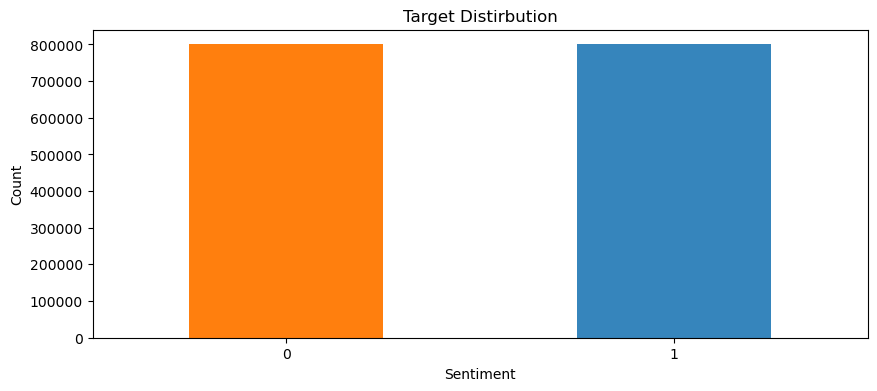

In [84]:
plt.figure(figsize=(10,4))
df['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

As we observe the graph above we have a balanced data set

In [85]:
df.duplicated().sum()

0

We don't see any duplicate values. We can further explore in our data.

In [86]:
df.head(2)

,Sentiment,Id,Date,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!


In [87]:
df.tail(2)

,Sentiment,Id,Date,User,Tweet
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [88]:
# removed PDT from the Date
df['Date'] = df['Date'].str.replace('PDT', '')

In [89]:
# sanity check
df['Date']

0          Mon Apr 06 22:19:45  2009
1          Mon Apr 06 22:19:49  2009
2          Mon Apr 06 22:19:53  2009
3          Mon Apr 06 22:19:57  2009
4          Mon Apr 06 22:19:57  2009
                     ...            
1599995    Tue Jun 16 08:40:49  2009
1599996    Tue Jun 16 08:40:49  2009
1599997    Tue Jun 16 08:40:49  2009
1599998    Tue Jun 16 08:40:49  2009
1599999    Tue Jun 16 08:40:50  2009
Name: Date, Length: 1600000, dtype: object

In [90]:
# converts to date and time - Don't run takes longer time to finish executing******
df["Date"] = pd.to_datetime(df["Date"])

In [91]:
# sanity check converted to date and time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Sentiment  1600000 non-null  int32         
 1   Id         1600000 non-null  int64         
 2   Date       1600000 non-null  datetime64[ns]
 3   User       1600000 non-null  object        
 4   Tweet      1600000 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 54.9+ MB


### Cleaning Data

- Check duplicate values
- Check Null Values

In [92]:
df['Date'].dt.year.value_counts()

2009    1600000
Name: Date, dtype: int64

It seem's our data only consist in year 2009

In [93]:
df['User'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: User, Length: 659775, dtype: int64

In [94]:
df['Id'].value_counts()

2190457769    2
1972193428    2
1989776729    2
1989776908    2
1564543229    2
             ..
2197311196    1
2197311146    1
2197310899    1
2197310477    1
2193602129    1
Name: Id, Length: 1598315, dtype: int64

Let's find out if there are any duplicates

In [95]:
df.duplicated().sum()

0

In [96]:
print(f'Id columns duplicate values: {df["Id"].duplicated().sum()}')
print(f'User columns duplicate values: {df["User"].duplicated().sum()}')
print(f'Tweet columns duplicate values: {df["Tweet"].duplicated().sum()}')

Id columns duplicate values: 1685
User columns duplicate values: 940225
Tweet columns duplicate values: 18534


We can see there are 1,685 duplicated tweets as per Id column

In [97]:
df[df['Id'] == 1989776729]

,Sentiment,Id,Date,User,Tweet
270201,0,1989776729,2009-06-01 02:46:20,mam1cutie,@Dog_Crazy Sorry yest was bad day for your mom! I hope today is a better day for her! I gotta go get ready for work - blah. lol
1217853,1,1989776729,2009-06-01 02:46:20,mam1cutie,@Dog_Crazy Sorry yest was bad day for your mom! I hope today is a better day for her! I gotta go get ready for work - blah. lol


It turns out there are duplicates in tweets

In [107]:
df[df.duplicated(subset=['Id', 'Tweet'])].head(6)

,Sentiment,Id,Date,User,Tweet
800261,1,1467863684,2009-04-06 22:33:35,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
800300,1,1467880442,2009-04-06 22:38:04,iCalvin,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
801280,1,1468053611,2009-04-06 23:28:09,mariejamora,@hellobebe I also send some updates in plurk but i upload photos on twitter! you didnt see any of my updates on plurk? Zero?
801573,1,1468100580,2009-04-06 23:42:57,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff
801650,1,1468115720,2009-04-06 23:48:00,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss you so much on the MFC but hope we can talk later on today kisses :huglove:
801794,1,1468131748,2009-04-06 23:53:22,steveslee,@gordonchiu You're one letter alway! Koreans don't use &quot;X&quot; so there's no hope for me.


Let's drop the duplicated tweets

In [102]:
df_clean = df.copy()

In [105]:
df_clean.drop_duplicates(subset=['Id', 'Tweet'], inplace=True)

In [106]:
# sanity check
df_clean["Id"].duplicated().sum()

0

In [109]:
df_clean['Id'].value_counts()

1467810369    1
1965217307    1
1965217986    1
1965217981    1
1965217921    1
             ..
2196889890    1
2196879563    1
2196878643    1
2196878471    1
2193602129    1
Name: Id, Length: 1598315, dtype: int64

We can ensure that we don't have any duplicate tweets as Id tweets are unique

In [125]:
df_clean['User'].duplicated().sum()

938540

In [ ]:
df_clean['User'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
sleeping_gypsy       1
alannamalyn          1
robertreset          1
juicybabyyy          1
bpbabe               1
Name: User, Length: 659775, dtype: int64

In [152]:
user_tweet_dup = df_clean.duplicated(subset=['User', 'Tweet']).value_counts()
user_tweet_dup

False    1594745
True        3570
dtype: int64

In [153]:
user_tweet_dup[1]/df_clean.shape[0]*100

0.2233602262382572

It's less than 1% of duplicate values, so we can drop it

In [156]:
df_clean[df_clean.duplicated(subset=['User', 'Tweet'], keep=False)].tail(10)

,Sentiment,Id,Date,User,Tweet
1597584,1,2192960960,2009-06-16 07:48:04,cereal_bars,"@staring_girl waaa, suerte con eso!"
1597608,1,2192961892,2009-06-16 07:48:09,CaraNinaMcfly,@Brantanamo Ant please can you say hey to cara and nina!! Your so awesomee!! x
1598287,1,2193152928,2009-06-16 08:04:06,SuPeR_mEgAn,@mikeyway http://twitpic.com/7j4ra - where can you buy this??? i wont drink the pop i just want the bottle!
1598289,1,2193152976,2009-06-16 08:04:07,SuPeR_mEgAn,@mikeyway http://twitpic.com/7j4ra - where can you buy this??? i wont drink the pop i just want the bottle!
1598957,1,2193318305,2009-06-16 08:17:40,majaricious,@KhloeKardashian Definitely my Mom. And Angelina Jolie
1598959,1,2193318357,2009-06-16 08:17:40,ummsistweets,cedar point with my biffs
1599353,1,2193427113,2009-06-16 08:26:38,parawhore182,Im busy. Drooling. Over this video. ;) but yeahh it does work captain! @lostducky0013
1599354,1,2193427134,2009-06-16 08:26:38,parawhore182,Im busy. Drooling. Over this video. ;) but yeahh it does work captain! @lostducky0013
1599377,1,2193427910,2009-06-16 08:26:43,ummsistweets,cedar point with my biffs
1599531,1,2193474515,2009-06-16 08:30:28,majaricious,@KhloeKardashian Definitely my Mom. And Angelina Jolie


We found out a duplicate tweets per user, we can drop the duplicates

In [157]:
df_clean.drop_duplicates(subset=['User', 'Tweet'], inplace=True)

In [158]:
df_clean.duplicated(subset=['User', 'Tweet']).value_counts()

False    1594745
dtype: int64

Nice! We dropped the duplicate tweets

In [159]:
df_clean.corr()

C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1863484124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,Sentiment,Id
Sentiment,1.000000,-0.261886
Id,-0.261886,1.000000


We observe the correlate Id and sentiment is not that high so we can drop the column

In [160]:
# dropping ID column
df_clean.drop(columns='Id', inplace=True)

In [161]:
# sanity check
df_clean.head()

,Sentiment,Date,User,Tweet
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [162]:
# Convert tweets to lower case
df_clean['Tweet'] = df_clean['Tweet'].str.lower()

In [164]:
# sanity check
df_clean['Tweet']

0          @switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d
1              is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!
2                                    @kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds
3                                                                              my whole body feels itchy and like its on fire 
4              @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there. 
                                                                  ...                                                         
1599995                                                               just woke up. having no school is the best feeling ever 
1599996                                         thewdb.com - very cool to hear old walt interviews!  â« http:/

In [165]:
# tagging and hastags in new column
df_clean['Tagging'] = df_clean['Tweet']\
    .apply(lambda x: ', '.join([mention.strip('@') for mention in x.split() if mention.startswith('@')]))
df_clean['Hashtags'] = df_clean['Tweet']\
    .apply(lambda x: ', '.join([hashtag.strip('#') for hashtag in x.split() if hashtag.startswith('#')]))

In [166]:
# Define the emojis pattern
emojis_pattern = r'(:\) |:\]|: \)|=\)|:d|;d|:\(|:\[|:- \))'

# Add a new column to store the presence of emojis
emojis = df_clean['Tweet'].str.extractall(emojis_pattern).groupby(level=0).agg(','.join)
df_clean['Emojis'] = emojis if not emojis.empty else None
df_clean['Emojis'] = df_clean['Emojis'].fillna('None')

In [167]:
df_clean.head(1)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",switchfoot,,;d


In [168]:
# cleaning the special characters
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&quot;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&amp;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&gt;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&lt;", ' ', regex=True)

In [169]:
df_clean[df_clean['User'] == 'c0der']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
1471948,1,2009-06-07 08:18:30,c0der,ð³ñ. twitter ñð°ð±ð¾ñð°ðµñ ð¸ ð¿ð¾ https,,,None


In [170]:
df_clean.drop(df_clean[df_clean['Tweet'].str.contains(r'ñ||å||§|ù||¹|¡|³|ã|©|®|â|¬|î|±|ä|°|ð|ç||é|ì|²|\
                                    ¢|×|¨|æ|¸|ë|ê|»|¶|à|¼|¾||£|')].index, inplace=True)

In [ ]:
df_clean['Emojis'] = emojis if not emojis.empty else None

In [179]:
df_clean['Tagging'] = df_clean['Tagging'].fillna('None').replace('', None)
df_clean['Hashtags'] = df_clean['Hashtags'].fillna('None').replace('', None)

In [186]:
df_clean[df_clean['Tweet'].str.contains(r'\W')].sample(5)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
904835,1,2009-05-04 04:38:34,HarryR,@lisadamast and he really doesn't like shiny happy people. i'm a local rem expert btw. saw them for the first time in 1986.,lisadamast,None,None
553166,0,2009-06-17 00:01:39,jeannemariepics,@diecasthawaii a few more years for what? i had another twitter time out,diecasthawaii,None,None
1187824,1,2009-05-31 12:44:41,ddlovato__,i found this picture that i love it http://twitgoo.com/d7gg,None,None,None
1262639,1,2009-06-01 19:15:49,lsmith77,"@kirstiealley i like fb diet, includes dk chocolate have had good results http://bit.ly/jp9ye",kirstiealley,None,None
164314,0,2009-05-29 07:46:54,monaah,contemplating borrowing one of my moms dogs just for today..i want to take care of someone.,None,None,None


In [187]:
df_clean[df_clean['Tweet'].str.contains(r'[^a-z ]')]

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",switchfoot,None,;d
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,None,None,None
2,0,2009-04-06 22:19:53,mattycus,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,kenichan,None,None
4,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",nationwideclass,None,None
5,0,2009-04-06 22:20:00,joy_wolf,@kwesidei not the whole crew,kwesidei,None,None
...,...,...,...,...,...,...,...
1599994,1,2009-06-16 08:39:00,EvolveTom,"@cliff_forster yeah, that does work better than just waiting for it in the end i just wonder if i have time to keep up a good blog.",cliff_forster,None,None
1599995,1,2009-06-16 08:40:49,AmandaMarie1028,just woke up. having no school is the best feeling ever,None,None,None
1599997,1,2009-06-16 08:40:49,bpbabe,are you ready for your mojo makeover? ask me for details,None,None,None
1599998,1,2009-06-16 08:40:49,tinydiamondz,happy 38th birthday to my boo of alll time!!! tupac amaru shakur,None,None,None


In [189]:
import string
import preprocessor as p

def clean_tweets(df_clean):
    #set up punctuations we want to be replaced
    removal_punctuation = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})|(\*)|(\$)|(\=)")
    pair_words = re.compile("(-)|(/)|(:).")
    tokenized_sentence = []
    for line in df_clean:
        # send to tweet_processor
        p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG)
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = removal_punctuation.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = pair_words.sub(" ", tmpL)
        tokenized_sentence.append(tmpL)
    return tokenized_sentence

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [191]:
df_clean['Tweet'] = clean_tweets(df_clean['Tweet'])

In [192]:
# sanity check - removed most of punctuation, mentions, urls, and hashtags
df_clean[df_clean['Tweet'].str.contains(r'[^a-z ]')]

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
2,0,2009-04-06 22:19:53,mattycus,i dived many times for the ball managed to save 50 the rest go out of bounds,kenichan,None,None
24,0,2009-04-06 22:20:41,Ljelli3166,blagh class at 8 tomorrow,None,None,None
30,0,2009-04-06 22:21:07,fatkat309,some1 hacked my account on aim now i have to make a new one,None,None,None
33,0,2009-04-06 22:21:11,Pbearfox,awe i love you too 1 am here i miss you,julieebaby,None,None
37,0,2009-04-06 22:21:30,ajaxpro,sorry bed time came here gmt+1,missxu,None,None
...,...,...,...,...,...,...,...
1599906,1,2009-06-16 08:38:39,Gregor_Boyd,been playing big surf island and ive unlocked 5 trophies already hah,None,None,None
1599927,1,2009-06-16 08:38:44,taylorbeckett,wow 840 am is pretty early for me to wake up lol,None,None,None
1599945,1,2009-06-16 08:38:49,kcnitt,oh yes and btw 800,None,None,None
1599966,1,2009-06-16 08:38:53,lexi234,got home an hour ago ate lunch watched some tv and now i listening to kelly clarkson no exam tomorrow yay 3 down 4 to go,None,None,None


In [193]:
df_clean['Tweet'] = df_clean.loc[:, 'Tweet'].str.replace(r'[^a-z ]', ' ')

C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\4207419134.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['Tweet'] = df_clean.loc[:, 'Tweet'].str.replace(r'[^a-z ]', ' ')


In [208]:
# check for empty Tweets
df_clean[df_clean['Tweet'] == ''].head()

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
208,0,2009-04-06 22:33:25,Artiel87,,mandayyy,None,None
249,0,2009-04-06 22:36:27,Artiel87,,mandayyy,None,None
398,0,2009-04-06 22:46:53,KimberlyKane,,danadearmond,None,None
430,0,2009-04-06 22:48:48,jtmal0723,,anistorm,None,None
1011,0,2009-04-06 23:30:23,gabysslave,,citizensheep,None,None


There is an empty tweets we can remove

In [209]:
df_clean = df_clean[df_clean['Tweet'] != '']

In [210]:
# sanity check
df_clean[df_clean['Tweet'] == '']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis


----

### End Cleaning

## EDA

In [221]:
df_clean.sample(2)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year
68060,0,2009-05-03 20:30:28,AndreaDSol,just checking my email sooo boring,None,None,None,5,3,2009
783207,0,2009-06-25 01:39:42,dincandela,tried to give up seat for lhr iad flight for perks fell through now in a broken economy seat,unitedairlines,None,None,6,25,2009


In [211]:
df_clean['Tagging'].value_counts()

mileycyrus                                3900
tommcfly                                  3336
ddlovato                                  2922
jonasbrothers                             2053
davidarchie                               1214
                                          ... 
julieand                                     1
ruby225                                      1
mpits                                        1
shantymanfan                                 1
thenspcc, sparkscharity, speakinguph4h       1
Name: Tagging, Length: 355943, dtype: int64

In [212]:
df_clean['Hashtags'].value_counts()

followfriday                                                 2032
fb                                                           1669
squarespace                                                   742
ff                                                            704
iranelection                                                  374
                                                             ... 
screwf1                                                         1
inaperfectworld, iranelection, goodpussy., gokeyisadouche       1
epicmeat, jergensmaterial                                       1
100, 37.                                                        1
bigrun                                                          1
Name: Hashtags, Length: 13959, dtype: int64

In [213]:
df_clean['Emojis'].value_counts()

None        1577427
;d             2456
:]              973
:[              204
:d              109
;d,;d            28
:],:]            19
:(                6
:],;d             5
:- )              3
;d,;d,;d          3
;d,:]             3
:[,:]             2
:[,:[             2
:],:],:]          2
:],:[             1
:d,:d             1
;d,:[             1
: )               1
:d,;d             1
Name: Emojis, dtype: int64

In [ ]:
df_clean.shape

(1581247, 7)

In [214]:
df_clean['Sentiment'].value_counts()

0    792078
1    789169
Name: Sentiment, dtype: int64

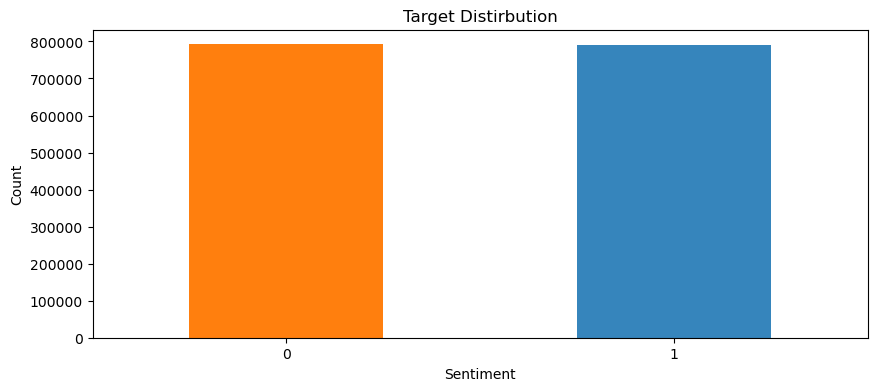

In [215]:
plt.figure(figsize=(10,4))
df_clean['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

In [219]:
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['Year'] = df_clean['Date'].dt.year

C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1554326582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Date'].dt.month
C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1554326582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Day'] = df_clean['Date'].dt.day


In [222]:
df_clean['Hour'] = df_clean['Date'].dt.hour
df_clean['Minutes'] = df_clean['Date'].dt.minute
df_clean['Seconds'] = df_clean['Date'].dt.second

C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1492955426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hour'] = df_clean['Date'].dt.hour
C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1492955426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Minutes'] = df_clean['Date'].dt.minute
C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1492955426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [223]:
# added a day of the week column
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()

C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\1255036111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()


In [225]:
df_clean.head(5)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year,Hour,Minutes,Seconds,DayOfWeek
0,0,2009-04-06 22:19:45,_TheSpecialOne_,awww thats a bummer you shoulda got david carr of third day to do it d,switchfoot,None,;d,4,6,2009,22,19,45,Monday
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,None,None,None,4,6,2009,22,19,49,Monday
2,0,2009-04-06 22:19:53,mattycus,i dived many times for the ball managed to save the rest go out of bounds,kenichan,None,None,4,6,2009,22,19,53,Monday
3,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,None,None,None,4,6,2009,22,19,57,Monday
4,0,2009-04-06 22:19:57,Karoli,no its not behaving at all im mad why am i here because i cant see you all over there,nationwideclass,None,None,4,6,2009,22,19,57,Monday


We can drop date column

In [227]:
df_clean.drop(columns=['Date'], inplace=True)

C:\Users\Emran\AppData\Local\Temp\ipykernel_8992\846303259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Date'], inplace=True)


In [228]:
df_clean.sample(2)

,Sentiment,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year,Hour,Minutes,Seconds,DayOfWeek
885488,1,drexar,wow just watch a movie called push very nice,None,None,None,5,3,2009,5,43,56,Sunday
90003,0,camillewadd37,im super tired at work im considering sleeping on my desk i slept terrible last night time for a new bed,None,None,None,5,10,2009,9,33,33,Sunday


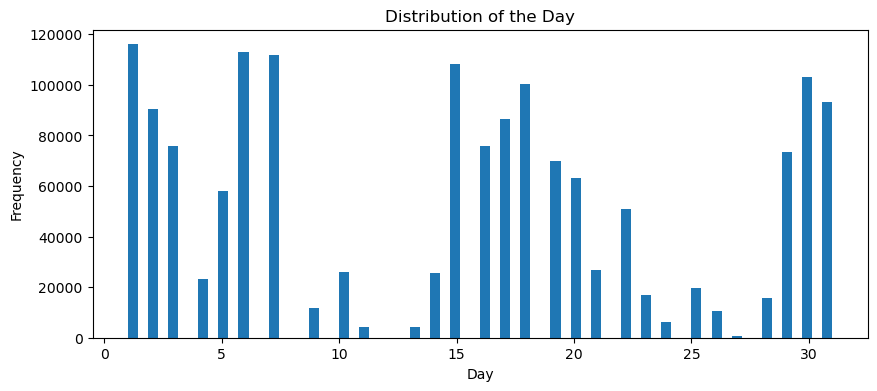

In [229]:
plt.figure(figsize=(10,4))
plt.hist(df_clean['Day'], bins=70) # histogram
plt.title('Distribution of the Day') # title
plt.xlabel('Day') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.show()

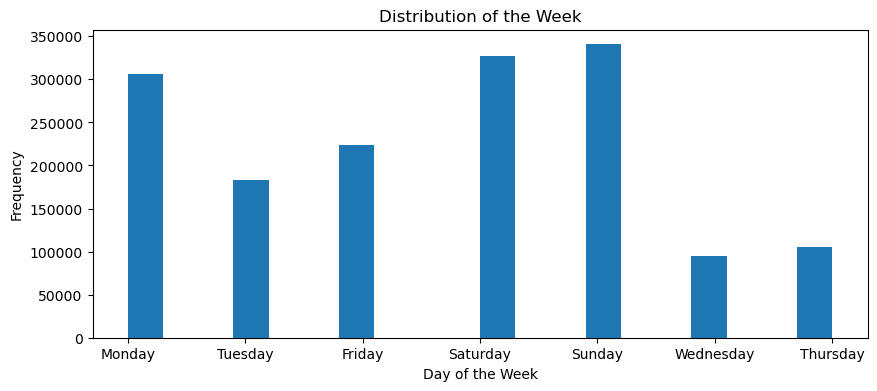

In [230]:
plt.figure(figsize=(10,4))
plt.hist(df_clean['DayOfWeek'], bins=20) # histogram
plt.title('Distribution of the Week') # title
plt.xlabel('Day of the Week') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.show()

In [231]:
df_clean.groupby(['DayOfWeek', 'Sentiment']).size().reset_index(name='Count')

,DayOfWeek,Sentiment,Count
0,Friday,0,113607
1,Friday,1,109861
2,Monday,0,131299
3,Monday,1,174831
4,Saturday,0,156222
5,Saturday,1,171290
6,Sunday,0,144184
7,Sunday,1,196421
8,Thursday,0,79227
9,Thursday,1,25694


<Figure size 3500x600 with 0 Axes>

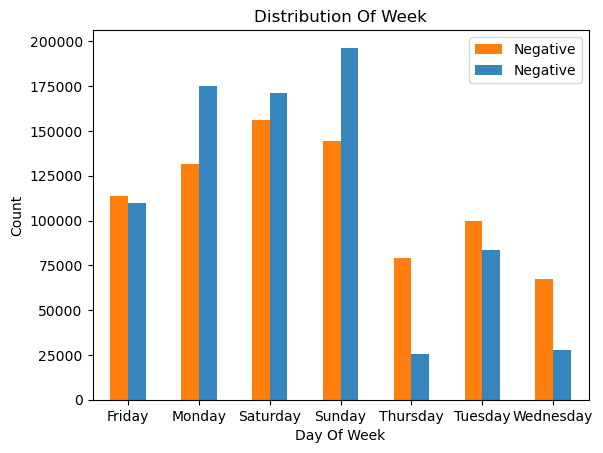

In [232]:
plt.figure(figsize=(35,6)) # setting a figure size 
grouped = df_clean.groupby(['DayOfWeek', 'Sentiment']).size().reset_index(name='Count')
# setting or pivoting Species as index, WNV as a column, and the total count as a value and using barh as a plot
grouped.pivot(index='DayOfWeek', columns='Sentiment', values='Count').plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC']) 
plt.title("Distribution Of Week") # title
plt.xlabel("Day Of Week") # labeling x-axis
plt.ylabel("Count") # labeling y-axis
#updating legend
label_map = {0: 'Negative', 1: 'Positive'}
legend_labels = [label_map[val] for val in df_clean['Sentiment']]
plt.legend(legend_labels)
plt.show()

In [233]:
df_clean['DayOfWeek'].value_counts()

Sunday       340605
Saturday     327512
Monday       306130
Friday       223468
Tuesday      183238
Thursday     104921
Wednesday     95373
Name: DayOfWeek, dtype: int64

### Saving the data

Now that we have spent the time cleaning and working with EDA. We are going to save it to a CSV file and begin to work with Data Wrangling

In [235]:
df_clean.to_csv('cleaned_twitter_data.csv', index=False)

In [236]:
#sanity check
pd.read_csv('cleaned_twitter_data.csv').sample(5)

,Sentiment,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year,Hour,Minutes,Seconds,DayOfWeek
175953,0,SunshineBoat,yes they are and now theyre all gone did you enjoy yours,asdquefty,NaN,None,5,29,2009,15,57,29,Friday
458769,0,jab_baller,no,ejgwapings,NaN,None,6,14,2009,23,13,33,Sunday
520440,0,dani_panic,ugh feel ill swine flu maybe,NaN,NaN,None,6,16,2009,8,48,54,Tuesday
1309514,1,Divineshe,i hate the calories love the ice creams,sangfroid,NaN,None,6,3,2009,2,52,35,Wednesday
1129509,1,LeliaK,we got the cookout in and a couple of games of cornhole before the rain all is well hope those in wilmington r ok,richwirdzek,NaN,None,5,30,2009,19,38,44,Saturday


---

## Conclusion